
<h1 id="实验要求">实验要求<a class="anchor-link" href="#实验要求">¶</a></h1><h3 id="截止日期：11月18日">截止日期：11月18日<a class="anchor-link" href="#截止日期：11月18日">¶</a></h3><p>作业的提交格式参考之前的说明，提交到2120220594@nankai.edu.cn</p>
<h3 id="基本要求">基本要求<a class="anchor-link" href="#基本要求">¶</a></h3><p>a)  采用分层采样的方式将数据集划分为训练集和测试集。 
b)  给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。</p>
<h3 id="中级要求">中级要求<a class="anchor-link" href="#中级要求">¶</a></h3><p>使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。</p>
<h3 id="高级要求">高级要求<a class="anchor-link" href="#高级要求">¶</a></h3><p>在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。</p>



<h2 id="分类原理——贝叶斯定理">分类原理——贝叶斯定理<a class="anchor-link" href="#分类原理——贝叶斯定理">¶</a></h2><p><img align="left" src="https://s2.loli.net/2022/10/23/B1YpEChVwO78rlM.png" style="zoom:46%"/></p>



<h2 id="分类原理——贝叶斯定理">分类原理——贝叶斯定理<a class="anchor-link" href="#分类原理——贝叶斯定理">¶</a></h2><p><img align="left" src="https://s2.loli.net/2022/10/23/FDEIoA4W5YVStPq.png" style="zoom:52%"/>
<img align="left" src="https://s2.loli.net/2022/10/23/hrLPV28JuZ67ewO.png" style="zoom:54%"/></p>



<h2 id="分类原理——朴素贝叶斯理论">分类原理——朴素贝叶斯理论<a class="anchor-link" href="#分类原理——朴素贝叶斯理论">¶</a></h2><p><img align="left" src="https://s2.loli.net/2022/10/23/hrLPV28JuZ67ewO.png" style="zoom:50%"/>
<img align="left" src="https://s2.loli.net/2022/10/23/EWpXI3mOCfcLtzx.png" style="zoom:50%"/></p>



<h2 id="优缺点">优缺点<a class="anchor-link" href="#优缺点">¶</a></h2><ul>
<li>优点：计算简单、有稳定的分类效率</li>
<li>缺点：<ul>
<li>需要估计类别的先验概率，且先验概率很多时候取决于假设，假设的模型可以有很多种，因此在某些时候会由于假设的先验模型不准确导致预测效果不佳。（通过目标值在训练数据中的频率来估计）。</li>
<li>假设属性之间相互独立，这个假设在实际应用中往往是不成立的，在属性个数比较多或者属性之间相关性较大时，分类效果不好。而在属性相关性较小时，朴素贝叶斯性能最为良好；</li>
</ul>
</li>
</ul>



<h2 id="实例">实例<a class="anchor-link" href="#实例">¶</a></h2><p><img align="left" src="https://s2.loli.net/2022/10/23/RTNn6U2MWgH3IAF.png" style="zoom:48%"/>
<img align="left" src="https://s2.loli.net/2022/10/23/yOWLSs7jJZl1XaY.png" style="zoom:52%"/></p>



<h2 id="混淆矩阵">混淆矩阵<a class="anchor-link" href="#混淆矩阵">¶</a></h2><p><img align="left" src="https://s2.loli.net/2022/10/23/KTWIOGnDPCVHXNx.png" style="zoom:66%"/></p>



<h2 id="ROC曲线和AUC">ROC曲线和AUC<a class="anchor-link" href="#ROC曲线和AUC">¶</a></h2><p><img align="left" src="https://s2.loli.net/2022/10/23/PA1JMTjqca78CvU.png" style="zoom:68%"/></p>


# 初级要求
a)  采用分层采样的方式将数据集划分为训练集和测试集。 
b)  给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。

In [21]:

# -*- coding: UTF-8 -*-
# 在wine数据集中，这些数据包括了三种酒中13种不同成分的数量。
# 文件中，每行代表一种酒的样本，共有178个样本；
# 一共有14列，其中，第一个属性是类标识符，分别是1/2/3 来表示，代表葡萄酒的三个分类。
# 后面的13列为每个样本的对应属性的样本值。
# 其中第1类有59个样本，第2类有71个样本，第3类有48个样本。
# 一个整数label和13个属性值

import math
import numpy as np  
import pandas as pd
import random
from random import sample

f = open('wine.data','r')
type_data = [[],[],[]]                      #按类分的所有数据
test_data = [[],[],[]]
train_data = [[],[],[]]
data_num = 0                            #数据总数
test_len = []                           #测试集里每一类的个数
means = [[],[],[]]                      #每一类的均值
std = [[],[],[]]                        #每一类的标准差
myline = '1'
while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
    # 类别存为int，属性变为float
    for t in range(len(myline)):
        if t == 0:
            myline[t] = int(myline[t])
        else:
            myline[t] = float(myline[t])
    temp = myline.pop(0)
    type_data[temp - 1].append(myline)
test_len = [round(len(type_data[i]) / 4) for i in range(3)]
data_num = sum([len(type_data[i]) for i in range(3)])



In [22]:
# 分层抽样分割数据集，data为数据集，len为存测试集长度的list
def sample_split(data,len_data):
    test_data = [[],[],[]]
    train_data = [[],[],[]]
    for i in range(3):
        test_data[i]=sample(data[i],len_data[i])
        for temp in test_data[i]:
            data[i].remove(temp)
        train_data[i]=data[i]
    return test_data,train_data

In [23]:
# 计算概率
def prob(data,avg,sig):
    # print(data)
    sqrt_2pi=np.power(2*np.pi,0.5)
    coef=1/(sqrt_2pi*sig)
    powercoef=-1/(2*np.power(sig,2))
    mypow=powercoef*(np.power((data-avg),2))
    p=coef*(np.exp(mypow))
    for i in range(len(p)):
        p[i]=math.log(p[i])
    return sum(p)

In [24]:
def bayes_classificate(data_set,len_data,num):
    # print(type(data_set[0]))
    # print(len(data_set))
    # data_set在运算过程中会变
   
    # 存预测概率
    p_score=[[],[],[]]
    # 先验概率
    p=[]
    for i in range(3):
        p.append(len(data_set[i])/num)
    # print(p)
    test_data,train_data=sample_split(data_set,len_data)
    # 首先，分别计算训练集上三个类的均值和标准差
    mean=[]
    std=[]
    # 存储预测得到的值
    y_predict=[[],[],[]]
    # print(data)
    # print(len(data_set[0]))
    test_num = sum([len(test_data[i]) for i in range(3)])
    
    for i in range(3):
        train_data[i]=np.array(train_data[i])
        mean.append(train_data[i].mean(axis=0))
        std.append(np.std(train_data[i], axis=0))
        test_data[i]=np.array(test_data[i])
    # print(mean)
    # print(std)
    wrong_num = 0
    for i in range(3):
        for t in test_data[i]:                  #两层循环：从每一类取每一个测试样本
            my_type = []
            for j in range(3):
                #由于数据集中所有的属性都是连续值，连续值的似然估计可以按照高斯分布来计算：
                # temp = ...
                # t每一维度算log再相加
                temp=prob(t,mean[j],std[j])+len(t)*math.log(p[j])
                # print(temp)
                my_type.append(temp)                        #这里将所有score保存
                # 样本被预测为第j类的概率
                p_score[j].append(temp)
            pre_type = my_type.index(max(my_type))          #取分值最大的为预测类别
            y_predict[i].append(pre_type)
            # print(pre_type)
            if pre_type != i:                               #统计错误数
                wrong_num+=1
    error_rate=round(wrong_num/test_num,3)
    print("分类准确率：{:f}".format(1-error_rate))
    return error_rate,y_predict,p_score



In [25]:
error_rate,y_predict,p_score=bayes_classificate(type_data,test_len,data_num)

分类准确率：0.978000


# 中级要求

### 使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。

In [26]:
# y_predict为3×n类型
def evaluate_model(y_predict):
    x=np.zeros((3,3))
    # confusion_matrix=np.mat(x)
    # test_num = sum([len(y_predict[i]) for i in range(3)])
    wrong_num=0
    precition=[]
    recall=[]
    for i in range(3):
        for pre in y_predict[i]:
            x[i][pre]+=1
            if(pre!=i):
                wrong_num+=1
    for i in range(x.shape[0]):
        precition.append(round(x[i][i]/sum([x[j][i] for j in range(x.shape[0])]),3))
        recall.append(round(x[i][i]/sum([x[i][j] for j in range(x.shape[1])]),3))
    P=np.mean(precition)
    R=np.mean(recall)
    F1=2*P*R/(P+R)
    confusion_matrix=np.mat(x)
    print("混淆矩阵为：",confusion_matrix)
    print("精度为 {:f},召回率为 {:f},F值为 {:f}".format(P,R,F1))
    return confusion_matrix,P,R,F1
    

In [27]:
evaluate_model(y_predict)

混淆矩阵为： [[15.  0.  0.]
 [ 0. 18.  0.]
 [ 0.  1. 11.]]
精度为 0.982333,召回率为 0.972333,F值为 0.977308


(matrix([[15.,  0.,  0.],
         [ 0., 18.,  0.],
         [ 0.,  1., 11.]]),
 0.9823333333333334,
 0.9723333333333333,
 0.9773077535243292)

# 高级要求
### 在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值


In [28]:
# 把p_score做归一化
def normalization(score):
    for i in range(3):
        max_v=max(score[i])
        min_v=min(score[i])
        distance=max_v-min_v
        # print(max_v)
        for j in range(len(score[i])):
            score[i][j]=(score[i][j]-min_v)/distance
    return score



In [29]:
# p_score 是预测概率，levels是阈值，data_len存每类数据的数目，返回点对
def ROC_AUC(p_score,levels,data_len):
    p_score=normalization(p_score)
    x=[[],[],[]]
    y=[[],[],[]]
    
    for i in range(3):
        true_num=data_len[i]
        false_num=sum(data_len)-true_num
        start=0
        end=start+data_len[i]
        if i!=0:
            start=sum(data_len[j] for j in range(i))
            end=start+data_len[i]
        # true_p=[]
        false_p=[]
        true_p=p_score[i][start:end]
        for j in range(sum(data_len)):
            if j not in range(start,end):
                false_p.append(p_score[i][j]) 
        

        for level in levels:
            # print("true_p")
            tempy=sum(value>level for value in true_p)
            tempx=sum(value>level for value in false_p)
            # print("tempx",tempx)
            # print("tempy",tempy)
            tempx/=false_num
            tempy/=true_num
            x[i].append(tempx)
            y[i].append(tempy)
    return x,y
 

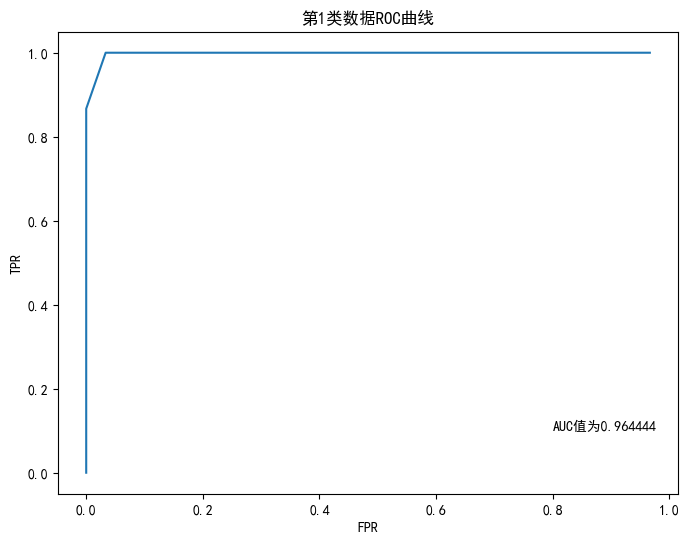

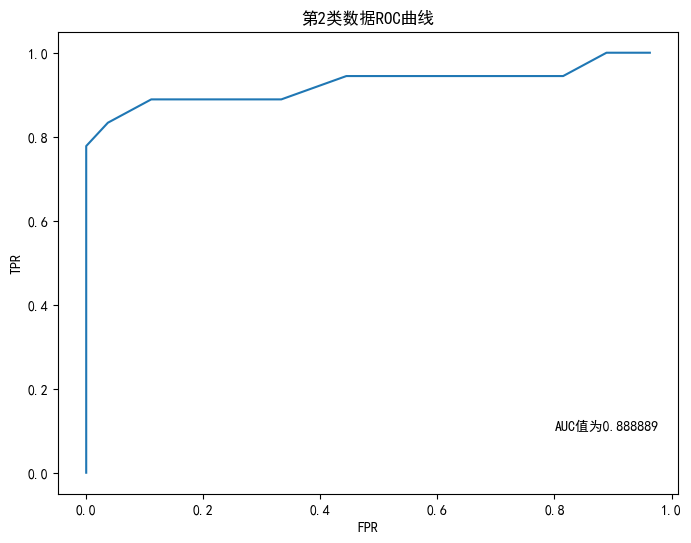

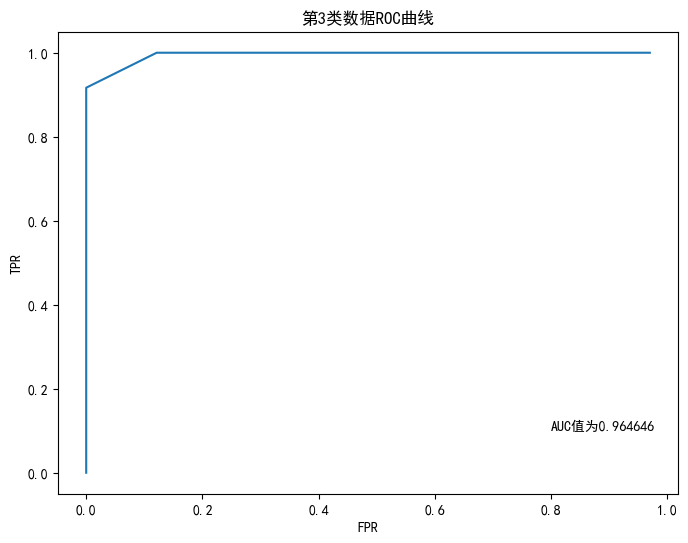

In [30]:
import matplotlib.pyplot as plt
levels=np.linspace(1,0,20)
x,y=ROC_AUC(p_score,levels,test_len)
# 绘制图形
for i in range(3):
    # 解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    plt.figure(figsize=(8,6))  # 定义图的大小
    plt.xlabel("FPR")     # X轴标签
    plt.ylabel("TPR")        # Y轴坐标标签
    plt.title("第{:d}类数据ROC曲线".format(i+1))      #  曲线图的标题
    plt.plot(x[i],y[i])            # 绘制曲线图
    plt.text(0.8,0.1,"AUC值为{:f}".format(np.trapz(y[i], x[i], dx = 0.05)))
    #在ipython的交互环境中需要这句话才能显示出来
    plt.show()
# 计算AUC值，也即曲线积分
